In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Učitavamo tablice
Podatke učitavamo iz .cvs datoteka koje su nam dostupne na https://analyse.kmi.open.ac.uk/open_dataset

In [4]:
assesments = pd.read_csv('anonymisedData/assessments.csv')
courses = pd.read_csv('anonymisedData/courses.csv')
studentAssesments = pd.read_csv('anonymisedData/studentAssessment.csv')
studentInfo = pd.read_csv('anonymisedData/studentInfo.csv')
studentRegistration = pd.read_csv('anonymisedData/studentRegistration.csv')
studentVle = pd.read_csv('anonymisedData/studentVle.csv')
vle = pd.read_csv('anonymisedData/vle.csv')

## Opis podataka

Podatci su smješteni u 7 tablica koje su povezane korištenjem id-eva: Student_ID, Course_ID, Presentation_ID, Assessment_ID, Student_Submission_ID, Vle_Content_ID, Vle_Student_ID

Imamo 3 glavne skupine podataka:

1) podatci o aktivnosti studenata
2) podatci o predavanjima/modulima
3) demografski podatci o studentima.

### 1) Podatci o aktivnosti studenata


Sastoje se od 3 povezane tablice: studentAssesments, studentRegistration i studentVle

#### a) studentAssesments

Sadrži podatke o predajama studenata. Svaki redak predstavlja jednu predaju.

Možemo vidjeti da imamo 173912 redaka te da svaki entry ima 5 atributa.
Score je jedini atribut koji ima null vrijednosti.


In [5]:
studentAssesments.info()
studentAssesments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB


,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


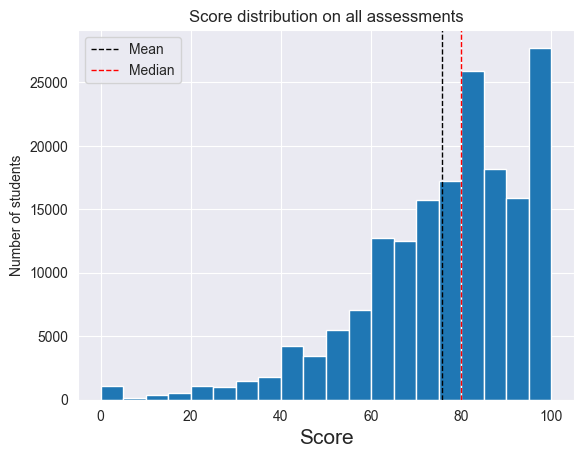

In [6]:
plt.hist(studentAssesments['score'], bins=20)
plt.xlabel('Score', fontsize=15)
plt.ylabel('Number of students')
plt.title('Score distribution on all assessments')
plt.axvline(studentAssesments['score'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(studentAssesments['score'].median(), color='r', linestyle='dashed', linewidth=1)
plt.legend({'Mean':studentAssesments['score'].mean(),'Median':studentAssesments['score'].median()})

plt.show()

Iz grafa iznad možemo vidjeti da distribucija ocjena naginje 'desno' - ima puno više viših ocjena nego nižih.

Mean je 75.8, a median 80.0 - to nam govori da postoji određena količina outlier podataka koji mean (prosjek) smanjuju.
Podatci koji pomiču prosjek su oni koji imaju ocjenu 0.0, a to su studenti koji nisu predali rad.

#### b) studentRegistration

Sadrži podatke o registraciji studenata na predavanje. Svaki redak predstavlja jednu registraciju.

***data_registration*** - datum registracije, opisan brojem koji predstavlja razliku u danima od početka predavanja
***data_unregistration*** - datum odjave, opisan brojem koji predstavlja razliku u danima od početka predavanja

Mean:  -69.4113002335013
Median:  -57.0


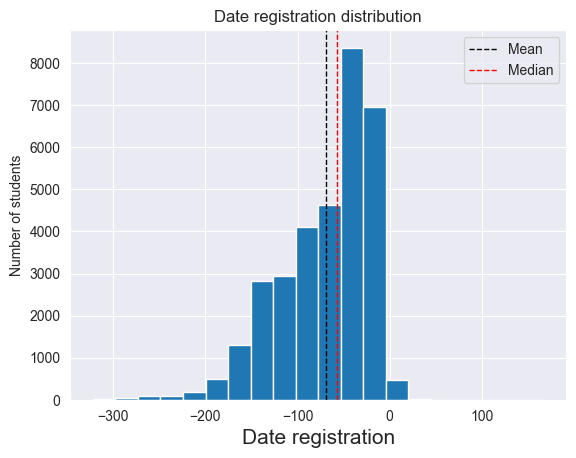

In [7]:
plt.hist(studentRegistration['date_registration'], bins=20)
plt.xlabel('Date registration', fontsize=15)
plt.ylabel('Number of students')
plt.title('Date registration distribution')
plt.axvline(studentRegistration['date_registration'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(studentRegistration['date_registration'].median(), color='r', linestyle='dashed', linewidth=1)
plt.legend({'Mean':studentRegistration['date_registration'].mean(),'Median':studentRegistration['date_registration'].median()})

print('Mean: ', studentRegistration['date_registration'].mean())
print('Median: ', studentRegistration['date_registration'].median())

plt.show()

Iz grafa iznad možemo vidjeti da je većina studenata registrirana na predavanje prije početka i to najviše njih 50 dana prije početka.

#### c) studentVle

Sadrži podatke o aktivnosti studenata na virtualnom okruženju. Svaki redak predstavlja jednu aktivnost.

***date*** - broj dana u odnosu na početak predavanja (negativna vrijednost - dani prije početka predavanja)
***sum_click*** - broj klikova na taj dan

Možemo primjetiti da su code_module i code_presentation tipa object. To je zbog što su oni stringovi različitih duljina.
Za sada nećemo vršiti nikakve promjene na tim stupcima (to će možda biti potrebno kasnije).

In [8]:
studentVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


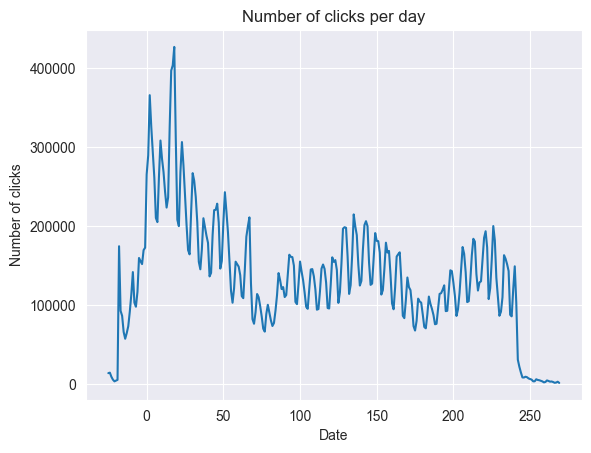

In [9]:
studentVle_grouped = studentVle[["date", "sum_click"]].groupby("date").sum()

plt.plot(studentVle_grouped.index, studentVle_grouped["sum_click"])
plt.xlabel('Date')
plt.ylabel('Number of clicks')
plt.title('Number of clicks per day')
plt.show()

Podatke iz tablice studentVle grupiramo po danima i zbrajamo broj klikova.

Iz grafa iznad možemo vidjeti kako broj interakcija sa stranicom oscilira tijekom predavanja.
To možemo objasniti s time da studenti imaju više interakcija sa stranicom kada se bliži vrijeme predaje (što je svakom studentu dobro poznato).



### 2) Podatci o predavanjima/modulima

Sastoje se od 3 povezane tablice: assesments, courses i vle.

#### a) Assesments

Sadrži podatke o predajama. Svaki redak predstavlja jednu predaju.
Obično, svaka kolegij ima nekoliko predaja i Završni ispit.

***assesment_type*** - tip predaje (TMA, CMA, Exam)
***date*** - broj dana koji je prošao od početka predavanja (negativna vrijednost - dani prije početka predavanja)
***weight*** - težina predaje zadatka izražena u %. Tipično Završni ispit ima težinu 100%, a ostale predaje imaju manju težinu (čiji je zbroj 100%)) 




In [10]:
assesments.info()
print("------")
print('Rows containing Nan date values:')

date_missing_values = assesments[assesments[['date', 'assessment_type']].isnull().any(axis=1)]
date_missing_values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               195 non-null    float64
 5   weight             206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB
------
Rows containing Nan date values:


,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


U tablici iznad možemo primjetiti da postoje null (NaN) vrijednosti u stupcu date.
U tim slučajevima, pretpostavlja se da je predaja na kraju tjedna zadnjeg predavanja.

Fltriranjem podataka možemo vidjeti da se to događa samo kod predavanja tipa Exam.

#### b) courses

Povezuje kolegije sa predavanjima tog koelgija (izvođenjem). Svaki redak predstavlja jedno izvođenje kolegija.

***code_presentation*** - identifikator predavanja. Format je godina-mjesec (2013B - predavanje u 2013 koje je krenulo u Veljači)

In [11]:
courses.info()
courses.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 656.0+ bytes


,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


Primjetimo da ovdje nema null vrijednosti. Oko ove tablice nema ništa posebno za napomenuti ili vizualizirati.

#### c) vle

Sadrži podatke o virtualnom okruženju. Svaki redak predstavlja jednu aktivnost kojoj studenti mogu pristupiti.

Možemo primjetiti da jedino ***week_from*** i ***week_to*** imaju null vrijednosti.
U opisu baze podataka ne piše ništa o tim null vrijednostima pa pretpostavljamo da one znače da je aktivnost dostupna cijelo vrijeme.

In [12]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


### 3) Demografski podatci o studentima

Sastoji se od jedne tablice: studentInfo

#### a) studentInfo

Sadrži demografske podatke o studentima. Svaki redak predstavlja jednog studenta.

Ova tablica sadrži podatke koji će nam biti od velike važnosti za analizu pošto nas govore o pozadini studenata.

Značajke koje traže dodatno objašnjenje:

***highest_education*** - najviša razina obrazovanja koju je student završio prije upisa na kolegij
***imd_band*** - indeks materijalne deprivacije (0%-100%) - 0 - najmanje deprivirani, 100 - najviše deprivirani
***age_band*** - raspon godina u kojem se nalazi student
***student_credits*** - broj bodova koje je student ostvario na kolegiju
***final_result*** - konačni rezultat kolegija (Pass, Fail, Withdrawn, Distinction)

In [13]:
studentInfo.info()
studentInfo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


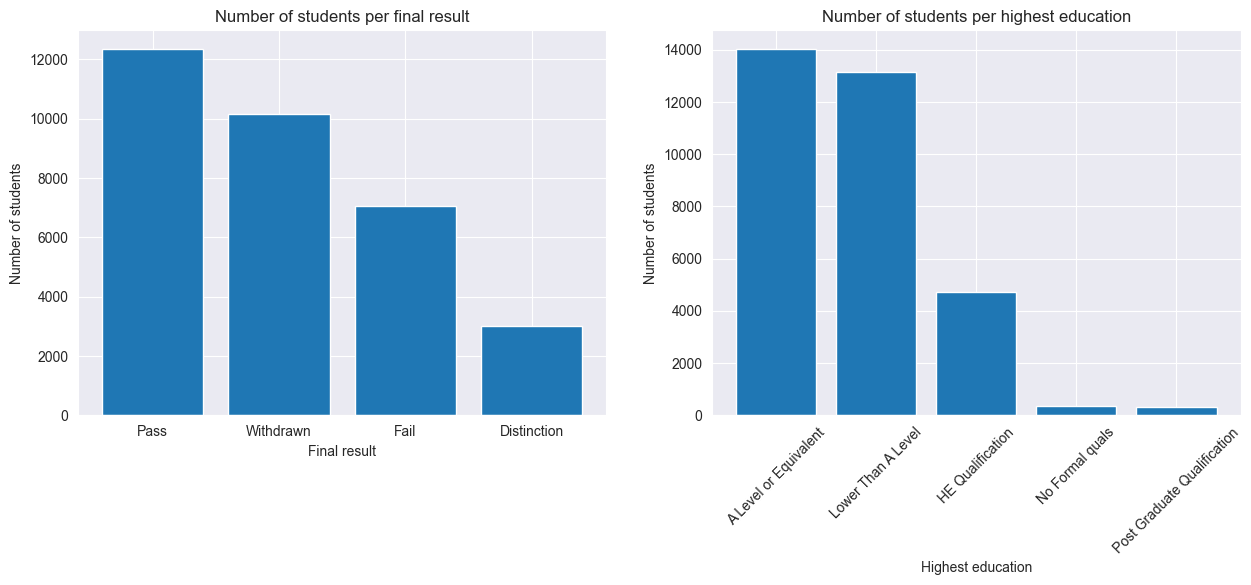

In [14]:
fig = plt.figure(figsize=(15, 5))
fig.subplots_adjust(wspace=0.2, hspace = 0.35)

studentInfo_final_result = studentInfo['final_result'].value_counts()

plt.subplot(1, 2, 1)
plt.bar(studentInfo_final_result.index, studentInfo_final_result)
plt.xlabel('Final result')
plt.ylabel('Number of students')
plt.title('Number of students per final result')

studentInfo_education_ft = studentInfo['highest_education'].value_counts()

plt.subplot(1, 2, 2)
plt.bar(studentInfo_education_ft.index, studentInfo_education_ft)
plt.xticks(rotation=45)
plt.xlabel('Highest education')
plt.ylabel('Number of students')
plt.title('Number of students per highest education')

plt.show()

Iz grafova iznad možemo iščitati nekoliko stvari:
   1) Vidimo da je veliki postotak studenata koji su upisali kolegij na kraju palo ili odustalo.
      Ovo je jedan od primarnih problema koji želimo riješiti ovom analizom.
          
2) Vidimo da najveći broj studenata ima najvišu razinu obrazovanja 'A Level or Equivalent'.
To nam govori da je kolegij koji analiziramo vjerojatno kolegij na preddiplomskoj razini.

Korelaciju između najviše razine obrazovanja i konačnog rezultata možemo vidjeti na sljedećem grafu:
       

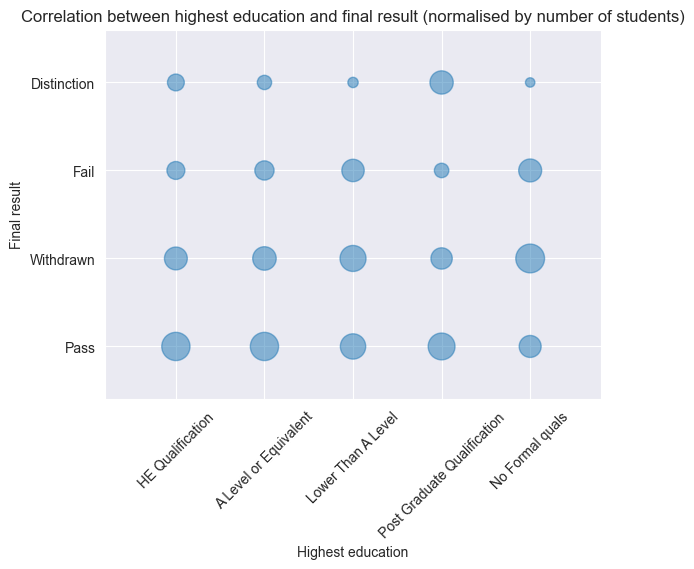

In [17]:
education_labels = studentInfo['highest_education'].unique()

final_result_labels = studentInfo['final_result'].unique()

bubble_size = []
counter = 0
for i in education_labels:
    studentInfo_education_ft = studentInfo['highest_education'].value_counts()
    number_of_students = studentInfo_education_ft[i]
    for j in final_result_labels:
        counter += 1
        
        bubble_size.append(studentInfo[(studentInfo['highest_education'] == i) & (studentInfo['final_result'] == j)].shape[0] / number_of_students * 2000)

array_size = np.array(bubble_size, dtype=np.float64)

education_labels_repeated = np.repeat(education_labels, len(final_result_labels))
final_result_labels_repeated = np.tile(final_result_labels, len(education_labels))

plt.scatter(education_labels_repeated, final_result_labels_repeated, s=array_size * 0.5, alpha=0.5)
plt.xticks(rotation=45)
plt.margins(0.2)
plt.xlabel('Highest education')
plt.ylabel('Final result')
plt.title('Correlation between highest education and final result (normalised by number of students)')
plt.show()

Na ovom grafu je očito da studenti koji imaju najnižu razinu obrazovanja *No Formal quals* imaju najveći postotak odustajanja.
Također možemo vidjeti da je najveći postotak studenata koji su završili sa uspjehom Distinction onaj koji ima najvišu razinu obrazovanja *Post Graduate Qualifications*.